In [1]:
!pip install rake-nltk

In [2]:
from rake_nltk import Rake
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data = pd.read_csv('dataset2.csv')

In [4]:
data

,The limited access to research databases and materials is causing a lot of frustration among students. We need better access to be able to succeed academically.,High
0,I'm having trouble finding the course material...,High
1,It's frustrating to have limited access to res...,High
2,I'm really struggling in one of my classes but...,High
3,I am really struggling with understanding the...,High
4,The grading system in this course is unfair a...,High
...,...,...
397,The transportation system in my city is not re...,Low
398,I've had to switch apartments multiple times b...,Low
399,The public transportation in my city is so cro...,Low
400,I've had to drop out of a few classes because ...,Low


# Columns

In [5]:
data.columns

Index(['The limited access to research databases and materials is causing a lot of frustration among students. We need better access to be able to succeed academically.', 'High'], dtype='object')

In [6]:
data.columns=['complaint','priority']

In [7]:
data

,complaint,priority
0,I'm having trouble finding the course material...,High
1,It's frustrating to have limited access to res...,High
2,I'm really struggling in one of my classes but...,High
3,I am really struggling with understanding the...,High
4,The grading system in this course is unfair a...,High
...,...,...
397,The transportation system in my city is not re...,Low
398,I've had to switch apartments multiple times b...,Low
399,The public transportation in my city is so cro...,Low
400,I've had to drop out of a few classes because ...,Low


In [8]:
data.iloc[399][0]

C:\Users\AJIT TATWADI\AppData\Local\Temp\ipykernel_17840\3518982216.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.iloc[399][0]


"The public transportation in my city is so crowded during peak hours, it's impossible to get a seat."

In [9]:
data.iloc[399][1]

C:\Users\AJIT TATWADI\AppData\Local\Temp\ipykernel_17840\3224166625.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.iloc[399][1]


'Low'

In [10]:
data['priority'].unique()

array(['High', 'Low'], dtype=object)

In [11]:
data['priority'].value_counts()

priority
High    237
Low     165
Name: count, dtype: int64

In [12]:
data.iloc[4]

complaint     The grading system in this course is unfair a...
priority                                                  High
Name: 4, dtype: object

In [13]:
data.iloc[4,0]

' The grading system in this course is unfair and inconsistent. It seems like the professor is picking favorites and not giving everyone a fair shot.'

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='priority'>

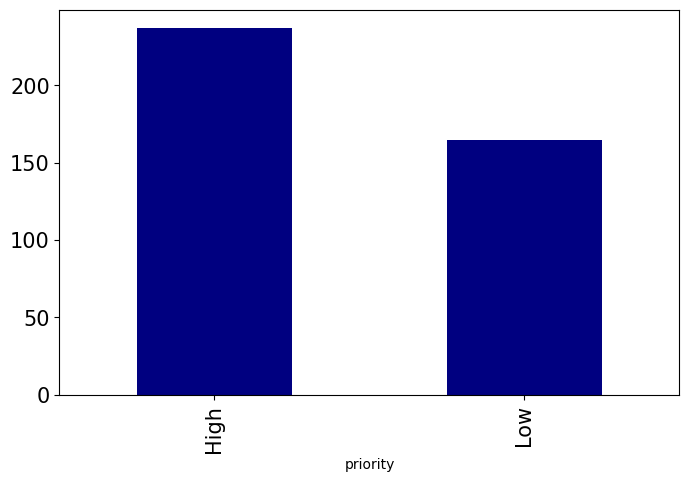

In [15]:
data['priority'].value_counts().plot(kind='bar', figsize=[8,5], fontsize=15, color='navy')

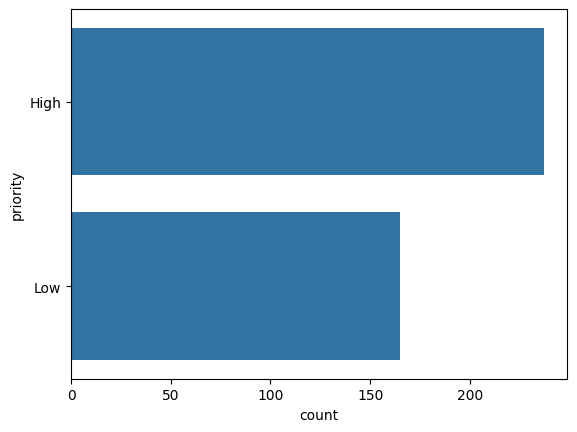

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, y='priority', order=data['priority'].value_counts().head(10).index)
#plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
data['Key_words'] = ''
r = Rake()
for index, row in data.iterrows():
    r.extract_keywords_from_text(row['complaint'])
    key_words_dict_scores = r.get_word_degrees()
    key_words = list(key_words_dict_scores.keys())
    data.at[index, 'Key_words'] = key_words

In [19]:
data

,complaint,priority,Key_words
0,I'm having trouble finding the course material...,High,"[trouble, finding, course, materials, need, cl..."
1,It's frustrating to have limited access to res...,High,"[frustrating, limited, access, research, datab..."
2,I'm really struggling in one of my classes but...,High,"[really, struggling, one, classes, get, appoin..."
3,I am really struggling with understanding the...,High,"[really, struggling, understanding, instructio..."
4,The grading system in this course is unfair a...,High,"[grading, system, course, unfair, inconsistent..."
...,...,...,...
397,The transportation system in my city is not re...,Low,"[transportation, system, city, reliable, miss,..."
398,I've had to switch apartments multiple times b...,Low,"[switch, apartments, multiple, times, landlord..."
399,The public transportation in my city is so cro...,Low,"[public, transportation, city, crowded, peak, ..."
400,I've had to drop out of a few classes because ...,Low,"[drop, classes, bus, schedule, line, class]"


In [20]:
data['Bag_of_words'] = ''
columns=['Key_words']
for index, row in data.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    data['Bag_of_words'].iloc[index] = words

In [21]:
data

,complaint,priority,Key_words,Bag_of_words
0,I'm having trouble finding the course material...,High,"[trouble, finding, course, materials, need, cl...",trouble finding course materials need classes ...
1,It's frustrating to have limited access to res...,High,"[frustrating, limited, access, research, datab...",frustrating limited access research databases ...
2,I'm really struggling in one of my classes but...,High,"[really, struggling, one, classes, get, appoin...",really struggling one classes get appointment ...
3,I am really struggling with understanding the...,High,"[really, struggling, understanding, instructio...",really struggling understanding instructions a...
4,The grading system in this course is unfair a...,High,"[grading, system, course, unfair, inconsistent...",grading system course unfair inconsistent seem...
...,...,...,...,...
397,The transportation system in my city is not re...,Low,"[transportation, system, city, reliable, miss,...",transportation system city reliable miss multi...
398,I've had to switch apartments multiple times b...,Low,"[switch, apartments, multiple, times, landlord...",switch apartments multiple times landlord kept...
399,The public transportation in my city is so cro...,Low,"[public, transportation, city, crowded, peak, ...",public transportation city crowded peak hours ...
400,I've had to drop out of a few classes because ...,Low,"[drop, classes, bus, schedule, line, class]",drop classes bus schedule line class


In [22]:
df = data[['priority','Bag_of_words']]

In [23]:
def process_text(text):
    import re
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return re.sub(r'\d',"",text)

In [24]:
df['Bag_of_words']=df['Bag_of_words'].apply(lambda x : process_text(x))

In [25]:
df

,priority,Bag_of_words
0,High,trouble finding course materials need classes ...
1,High,frustrating limited access research databases ...
2,High,really struggling one classes get appointment ...
3,High,really struggling understanding instructions a...
4,High,grading system course unfair inconsistent seem...
...,...,...
397,Low,transportation system city reliable miss multi...
398,Low,switch apartments multiple times landlord kept...
399,Low,public transportation city crowded peak hours ...
400,Low,drop classes bus schedule line class


In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
count_vect=CountVectorizer(lowercase=True,
                      stop_words='english'
                     # ,min_df=0.2,
                      #max_df=0.95
                          )
count_vect.fit(df['Bag_of_words'])
count_vect_transform=count_vect.transform(df['Bag_of_words'])

In [27]:
count_vect_transform

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3166 stored elements and shape (402, 890)>

In [28]:
count_vect_transform.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
count_vect.get_feature_names_out()

array(['ability', 'able', 'abused', 'abusive', 'academic', 'academically',
       'academics', 'accent', 'accept', 'access', 'accessing',
       'accommodated', 'account', 'accredited', 'accurate', 'achieve',
       'achieving', 'activities', 'additional', 'addressed', 'addressing',
       'adjust', 'administrative', 'advances', 'advantage', 'advertised',
       'advising', 'advisor', 'advisors', 'affairs', 'affecting',
       'afford', 'affordable', 'aggressive', 'ago', 'aid', 'air',
       'alarms', 'alcohol', 'anonymous', 'answer', 'anxiety', 'anxious',
       'apartments', 'apparent', 'appearance', 'appetizing',
       'application', 'appointment', 'appointments', 'appreciate',
       'approachable', 'area', 'areas', 'art', 'ask', 'asked', 'asking',
       'aspirations', 'assignment', 'assignments', 'assistants',
       'athlete', 'athletes', 'athletic', 'attend', 'attending',
       'attention', 'attire', 'audio', 'availability', 'available',
       'balance', 'balanced', 'balanci

In [30]:
len(count_vect.get_feature_names_out())

890

In [31]:
pd.DataFrame(count_vect_transform.toarray(),columns=count_vect.get_feature_names_out()).head()

,ability,able,abused,abusive,academic,academically,academics,accent,accept,access,...,workforce,working,workload,workshops,worried,worth,write,wrong,year,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
tfidf_vect=TfidfTransformer()
x_train_tfidf=tfidf_vect.fit(count_vect_transform)
x_train_tfidf_transform=x_train_tfidf.transform(count_vect_transform)

In [33]:
pd.DataFrame(x_train_tfidf_transform.toarray(),columns=count_vect.get_feature_names_out()).head()

,ability,able,abused,abusive,academic,academically,academics,accent,accept,access,...,workforce,working,workload,workshops,worried,worth,write,wrong,year,zone
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.146618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.287544,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.187057,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [34]:
df['priority']

0      High
1      High
2      High
3      High
4      High
       ... 
397     Low
398     Low
399     Low
400     Low
401     Low
Name: priority, Length: 402, dtype: object

In [35]:
y=df['priority']
y.shape

(402,)

In [36]:
x_train_tfidf_transform.shape

(402, 890)

# Spliting the data set into train and test 

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train_tfidf_transform,y,train_size=0.75,random_state=42)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Naive_bayes

In [39]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb_predict=mnb.predict(x_test)
print(" confusion matrix ")
print("-----------------------------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test,mnb_predict))
print("-----------------------------------------------------------------------------------------------------------------")
print("accuracy score")
print("-----------------------------------------------------------------------------------------------------------------")
print(accuracy_score(y_test,mnb_predict))
print("-----------------------------------------------------------------------------------------------------------------")
print("Classification Report")
print("-----------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test,mnb_predict))

 confusion matrix 
-----------------------------------------------------------------------------------------------------------------
[[54  7]
 [14 26]]
-----------------------------------------------------------------------------------------------------------------
accuracy score
-----------------------------------------------------------------------------------------------------------------
0.7920792079207921
-----------------------------------------------------------------------------------------------------------------
Classification Report
-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.79      0.89      0.84        61
         Low       0.79      0.65      0.71        40

    accuracy                           0.79       101
   macro avg       0.79      0.77      0.77       101
weighted avg       0.79      0.79      0.79       101



# DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print(" confusion matrix ")
print("-----------------------------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test,dt_pred))
print("-----------------------------------------------------------------------------------------------------------------")
print("accuracy score")
print("-----------------------------------------------------------------------------------------------------------------")
print(accuracy_score(y_test,dt_pred))
print("-----------------------------------------------------------------------------------------------------------------")
print("Classification Report")
print("-----------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test,dt_pred))

 confusion matrix 
-----------------------------------------------------------------------------------------------------------------
[[54  7]
 [21 19]]
-----------------------------------------------------------------------------------------------------------------
accuracy score
-----------------------------------------------------------------------------------------------------------------
0.7227722772277227
-----------------------------------------------------------------------------------------------------------------
Classification Report
-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.72      0.89      0.79        61
         Low       0.73      0.47      0.58        40

    accuracy                           0.72       101
   macro avg       0.73      0.68      0.68       101
weighted avg       0.72      0.72      0.71       101



# RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print(" confusion matrix ")
print("-----------------------------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test,rf_pred))
print("-----------------------------------------------------------------------------------------------------------------")
print("accuracy score")
print("-----------------------------------------------------------------------------------------------------------------")
print(accuracy_score(y_test,rf_pred))
print("-----------------------------------------------------------------------------------------------------------------")
print("Classification Report")
print("-----------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test,rf_pred))

 confusion matrix 
-----------------------------------------------------------------------------------------------------------------
[[55  6]
 [14 26]]
-----------------------------------------------------------------------------------------------------------------
accuracy score
-----------------------------------------------------------------------------------------------------------------
0.801980198019802
-----------------------------------------------------------------------------------------------------------------
Classification Report
-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.80      0.90      0.85        61
         Low       0.81      0.65      0.72        40

    accuracy                           0.80       101
   macro avg       0.80      0.78      0.78       101
weighted avg       0.80      0.80      0.80       101



In [42]:
print(rf.predict(count_vect.transform(['trouble finding course materials need classes library bookstore always sold'])))

['High']


# Model Export Deployment

In [43]:
import pickle

In [44]:
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Model Test

In [45]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [46]:
print(model.predict(count_vect.transform(['trouble finding course materials need classes library bookstore always sold'])))

['High']


In [47]:
arr=np.array(['trouble finding course materials need classes library bookstore always sold'])

In [48]:
arr

array(['trouble finding course materials need classes library bookstore always sold'],
      dtype='<U75')

In [49]:
print(model.predict(count_vect.transform(arr)))

['High']


In [ ]:
import os
import pickle
import numpy as np
from flask import Flask, render_template, request, jsonify
app = Flask(__name__)
@app.route('/result', methods=['POST'])
def result():
    try:
        json_data = request.get_json()
        c=json_data['complaint']
        result=model.predict(count_vect.transform([c]))
        return jsonify(result=str(result[0]))
    except Exception as e:
        return jsonify(error=str(e)), 400

if __name__ == '__main__':
    app.run(debug=False, port=5024)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5024
Press CTRL+C to quit
